In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# data reading

In [32]:
# Load the data from the CSV file
file_path = 'g:/House Rent Prediction/model/houserentdhaka.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


In [34]:
print(data.columns)

Index(['Unnamed: 0', 'Location', 'Area', 'Bed', 'Bath', 'Price'], dtype='object')


# Data Cleaning

In [37]:
def extract_specific_location(text):
    # Split the text by commas
    places = text.split(',')
    # Strip leading/trailing spaces from each part
    places = [place.strip() for place in places]
    # Return the second-to-last place as the most specific location
    if len(places) > 1:
        return places[-2]  # Second-to-last place is considered the most specific
    return places[-1]  # If only one part, return it


data['Place'] = data['Location'].apply(extract_specific_location)

print(data[['Location', 'Place']])

                                                Location            Place
0                        Block H, Bashundhara R-A, Dhaka  Bashundhara R-A
1                               Farmgate, Tejgaon, Dhaka          Tejgaon
2      Block B, Nobodoy Housing Society, Mohammadpur,...      Mohammadpur
3                              Gulshan 1, Gulshan, Dhaka          Gulshan
4                                       Baridhara, Dhaka        Baridhara
...                                                  ...              ...
28795                           Section 2, Mirpur, Dhaka           Mirpur
28796                    Block F, Bashundhara R-A, Dhaka  Bashundhara R-A
28797         RK Mission Road, Gopibag, Motijheel, Dhaka        Motijheel
28798                Ullan, West Rampura, Rampura, Dhaka          Rampura
28799                               Vatara, Badda, Dhaka            Badda

[28800 rows x 2 columns]


In [39]:
data.shape

(28800, 7)

In [41]:
# Convert 'area' to numerical format
data['Area'] = data['Area'].str.replace(',', '').str.replace(' sqft', '').astype(float)

# Function to convert price to numerical format
def convert_price(price):
    if 'Thousand' in price:
        return float(price.replace(' Thousand', '')) * 1000
    elif 'Lakh' in price:
        return float(price.replace(' Lakh', '')) * 100000
    else:
        return float(price)

# Apply conversion to 'price' column
data['Price'] = data['Price'].apply(convert_price)

# Function to clean bed and bath values
def clean_bed_bath(value):
    # Convert to string, split on space, and take the first part
    value = str(value).split()[0]
    try:
        return int(value)  # Convert to integer
    except ValueError:
        return None  # Return None if conversion fails

# Clean the 'beds' column
data['Bed'] = data['Bed'].apply(clean_bed_bath)

# Clean the 'bath' column
data['Bath'] = data['Bath'].apply(clean_bed_bath)

# Display cleaned data
data.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price,Place
0,0,"Block H, Bashundhara R-A, Dhaka",1600.0,3,3,20000.0,Bashundhara R-A
1,1,"Farmgate, Tejgaon, Dhaka",900.0,2,2,20000.0,Tejgaon
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250.0,3,3,18000.0,Mohammadpur
3,3,"Gulshan 1, Gulshan, Dhaka",2200.0,3,4,75000.0,Gulshan
4,4,"Baridhara, Dhaka",2200.0,3,3,75000.0,Baridhara


In [43]:
data.Place.unique()

array(['Bashundhara R-A', 'Tejgaon', 'Mohammadpur', 'Gulshan',
       'Baridhara', 'Hazaribag', 'Mirpur', 'Nikunja', 'Uttara',
       'Khilgaon', 'Ibrahimpur', 'Badda', 'Adabor', 'Jatra Bari',
       'Malibagh', 'Banani', 'Kakrail', 'Dhanmondi', 'Maghbazar',
       'Kalachandpur', 'Niketan', 'Eskaton', 'Banasree', 'Bashabo',
       'Baridhara DOHS', 'Aftab Nagar', 'Lalmatia', 'Dakshin Khan',
       'Mohakhali DOHS', 'Sutrapur', 'Hatirpool', 'Agargaon', 'Rampura',
       'Cantonment', 'Shahbagh', 'Khilkhet', 'Motijheel', 'Shantinagar',
       'Shegunbagicha', 'Kathalbagan', 'Shyamoli', 'Kalabagan', 'Demra',
       'Kuril', 'Mohakhali', 'Lalbagh', 'New Market', 'Kafrul',
       'Kachukhet', 'Turag', 'Dhaka', 'Nadda', 'Shyampur', 'Maniknagar',
       'Banani DOHS', 'Shiddheswari', 'Bangshal', 'Paribagh',
       'Joar Sahara', 'Mugdapara', 'North Shahjahanpur', 'Kotwali',
       'Shahjahanpur', 'Uttar Khan', 'Taltola', 'Sadarghat',
       'Banglamotors', 'Zafrabad', 'Keraniganj'], dtype=ob

In [45]:
# Check for null values
null_values = data.isnull().sum()

# Display columns with null values
print(null_values[null_values > 0])

Series([], dtype: int64)


In [47]:
empty_location_count = data['Place'].isna().sum()
print(empty_location_count)

0


# Feature engineering

In [50]:
# Example of feature engineering: price per square foot
data['price_per_sqft'] = data['Price'] / data['Area']

data.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price,Place,price_per_sqft
0,0,"Block H, Bashundhara R-A, Dhaka",1600.0,3,3,20000.0,Bashundhara R-A,12.500000
1,1,"Farmgate, Tejgaon, Dhaka",900.0,2,2,20000.0,Tejgaon,22.222222
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250.0,3,3,18000.0,Mohammadpur,14.400000
3,3,"Gulshan 1, Gulshan, Dhaka",2200.0,3,4,75000.0,Gulshan,34.090909
4,4,"Baridhara, Dhaka",2200.0,3,3,75000.0,Baridhara,34.090909


# Outlier remove

In [53]:
# Get the count of unique values in the 'location' column
location_stats = data.groupby('Place')['Place'].agg('count').sort_values(ascending = False)

location_stats

Place
Mirpur             8451
Mohammadpur        3612
Uttara             2070
Badda              1831
Bashundhara R-A    1397
                   ... 
Demra                 7
Zafrabad              7
Keraniganj            3
Sadarghat             2
Banglamotors          2
Name: Place, Length: 69, dtype: int64

In [55]:
len(location_stats)

69

In [57]:
len(location_stats[location_stats<=20])

15

In [59]:
location_stats_less_than_20 = location_stats[location_stats<=20]
location_stats_less_than_20

Place
Mugdapara         19
Uttar Khan        17
Kachukhet         15
Dhaka             13
Kotwali           11
Mohakhali DOHS    11
Paribagh          10
Taltola           10
Maniknagar        10
Shahbagh           7
Demra              7
Zafrabad           7
Keraniganj         3
Sadarghat          2
Banglamotors       2
Name: Place, dtype: int64

In [61]:
data.Place = data.Place.apply(lambda x: 'other' if x in location_stats_less_than_20 else x)
len(data.Place.unique())

55

In [63]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Location,Area,Bed,Bath,Price,Place,price_per_sqft
0,"Block H, Bashundhara R-A, Dhaka",1600.0,3,3,20000.0,Bashundhara R-A,12.500000
1,"Farmgate, Tejgaon, Dhaka",900.0,2,2,20000.0,Tejgaon,22.222222
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250.0,3,3,18000.0,Mohammadpur,14.400000
3,"Gulshan 1, Gulshan, Dhaka",2200.0,3,4,75000.0,Gulshan,34.090909
4,"Baridhara, Dhaka",2200.0,3,3,75000.0,Baridhara,34.090909


In [65]:
data[data.Area/data.Bed<300].head()

,Location,Area,Bed,Bath,Price,Place,price_per_sqft
39,"Kajla, Jatra Bari, Dhaka",800.0,3,2,15000.0,Jatra Bari,18.750000
86,"Block C, Section 13, Mirpur, Dhaka",745.0,3,2,15000.0,Mirpur,20.134228
135,"Kajla, Jatra Bari, Dhaka",800.0,3,2,15000.0,Jatra Bari,18.750000
186,"Nayatola, Maghbazar, Dhaka",550.0,2,2,13000.0,Maghbazar,23.636364
191,"Baitul Aman Housing Society, Adabor, Dhaka",550.0,2,1,8500.0,Adabor,15.454545


In [67]:
condition = (data.Area/data.Bed) < 300

# Negate the mask to get rows where the condition is not met
data2 = data[~condition]

# Check the shape of the resulting DataFrame
print(data2.shape)

(27876, 7)


In [69]:
data2.price_per_sqft.describe()

count    27876.000000
mean        18.946916
std          6.575892
min          6.500000
25%         15.384615
50%         18.000000
75%         20.952381
max        228.571429
Name: price_per_sqft, dtype: float64

In [71]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Place'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data3 = remove_pps_outliers(data2)
data3.shape

(19919, 7)

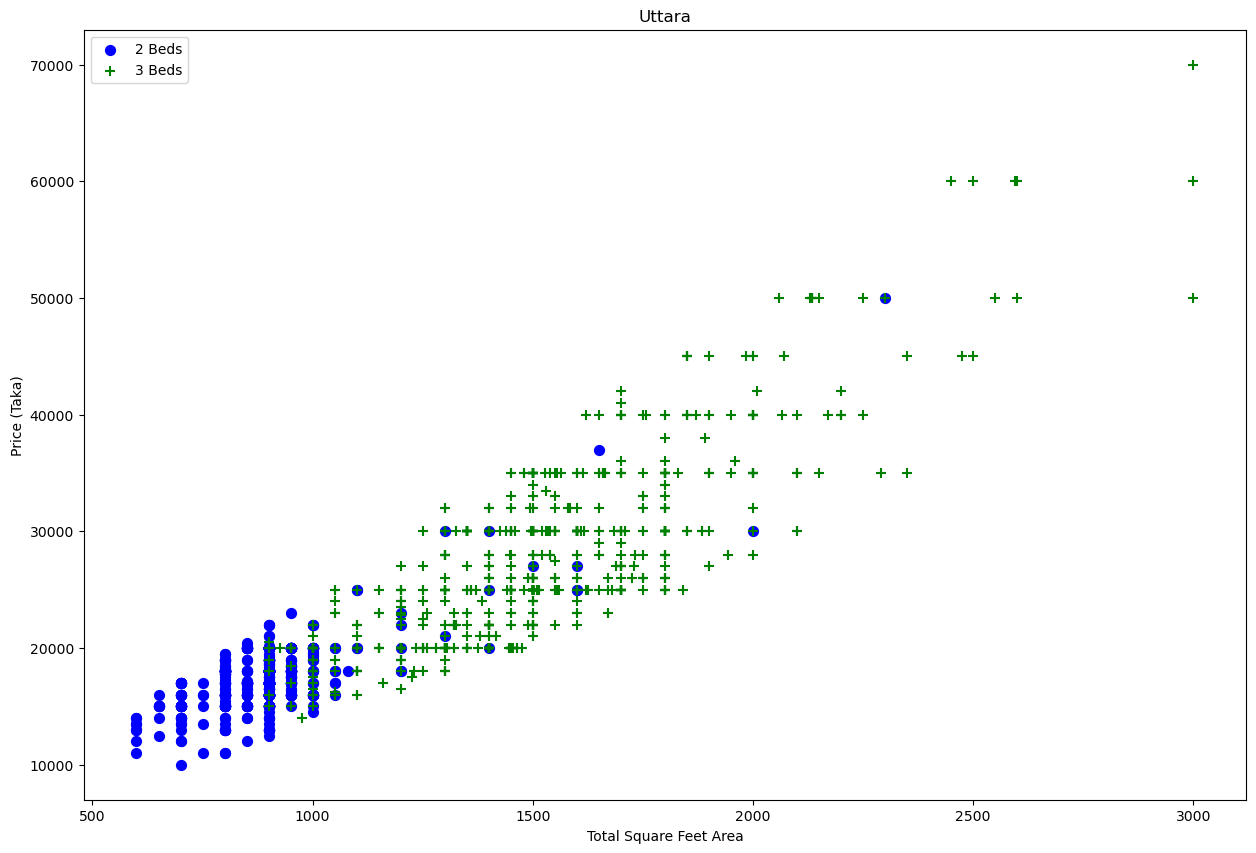

In [73]:
def plot_scatter_chart(df,location):
    beds2 = df[(df.Place==location) & (df.Bed==2)]
    beds3 = df[(df.Place==location) & (df.Bed==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(beds2.Area,beds2.Price,color='blue',label='2 Beds', s=50)
    plt.scatter(beds3.Area,beds3.Price,marker='+', color='green',label='3 Beds', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Taka)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data3,"Uttara")

In [74]:
def remove_bhk_outliers(df):
    exclude_indices = []
    
    # Group by 'Place'
    for location, location_df in df.groupby('Place'):
        # Calculate statistics for each number of bedrooms
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Bed'):
            bhk_stats[bhk] = {
                'mean': bhk_df.price_per_sqft.mean(),
                'std': bhk_df.price_per_sqft.std(),
                'count': bhk_df.shape[0]
            }
        
        # Identify outliers based on comparison with properties having one less bedroom
        for bhk, bhk_df in location_df.groupby('Bed'):
            prev_bhk_stats = bhk_stats.get(bhk - 1)
            if prev_bhk_stats and prev_bhk_stats['count'] > 3:
                # Find indices where price per sqft is less than the mean of the previous BHK
                outlier_indices = bhk_df[bhk_df.price_per_sqft < prev_bhk_stats['mean']].index
                exclude_indices.extend(outlier_indices)
    
    # Drop the identified outliers from the DataFrame
    return df.drop(exclude_indices, axis='index')

# Apply the function to remove outliers
data4 = remove_bhk_outliers(data3)
data4.shape


(9407, 7)

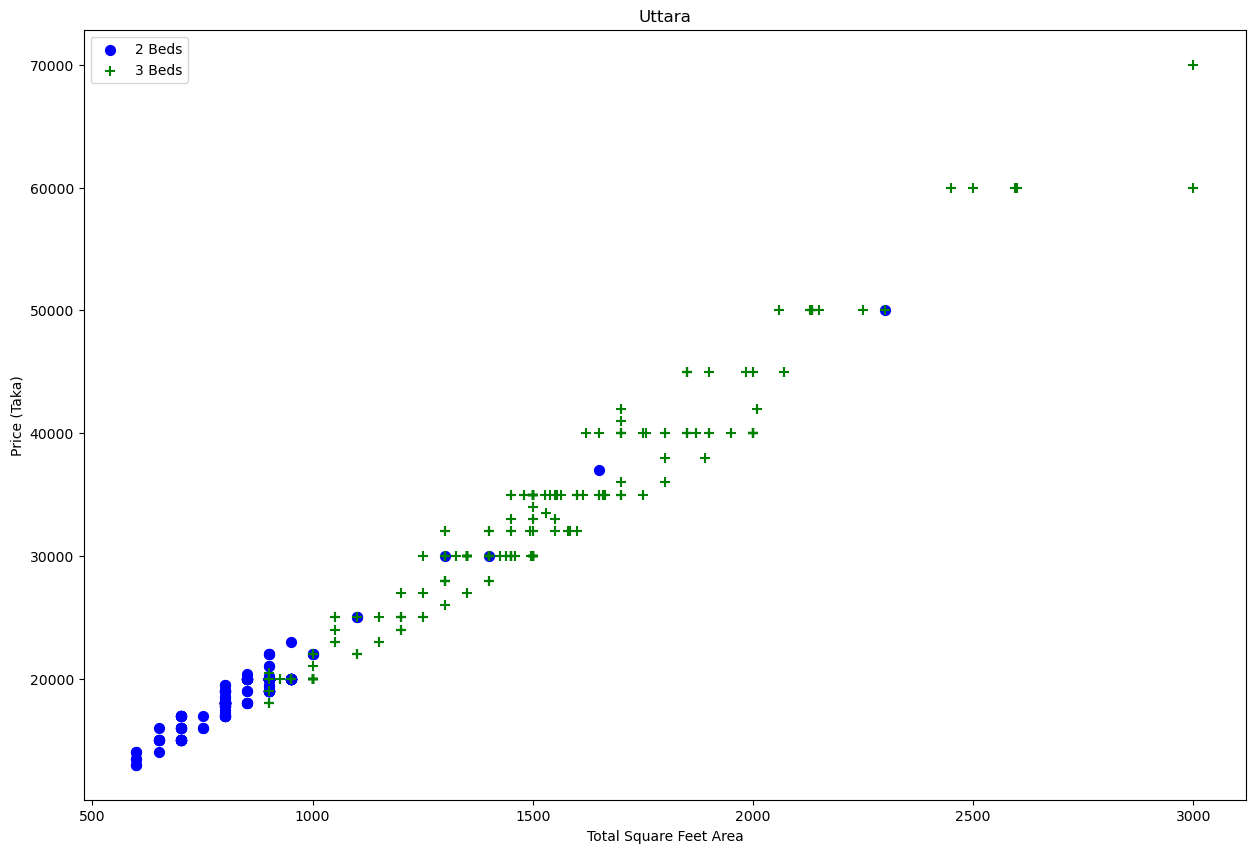

In [77]:
plot_scatter_chart(data4,"Uttara")

In [79]:
data4.Bath.unique()

array([3, 2, 1, 4, 5, 6], dtype=int64)

Text(0, 0.5, 'Count')

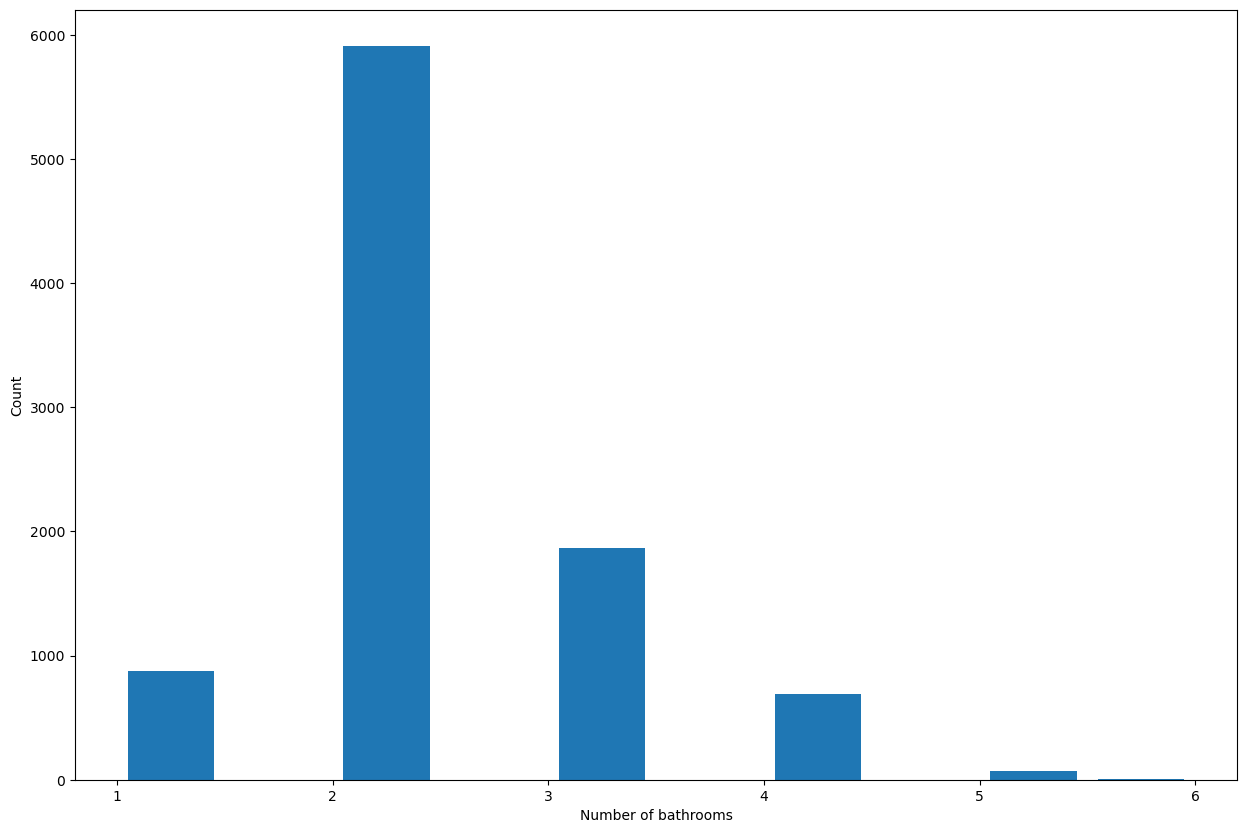

In [81]:
plt.hist(data4.Bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [82]:
data4.Bed.unique()

array([3, 2, 4, 1, 5, 6], dtype=int64)

Text(0, 0.5, 'Count')

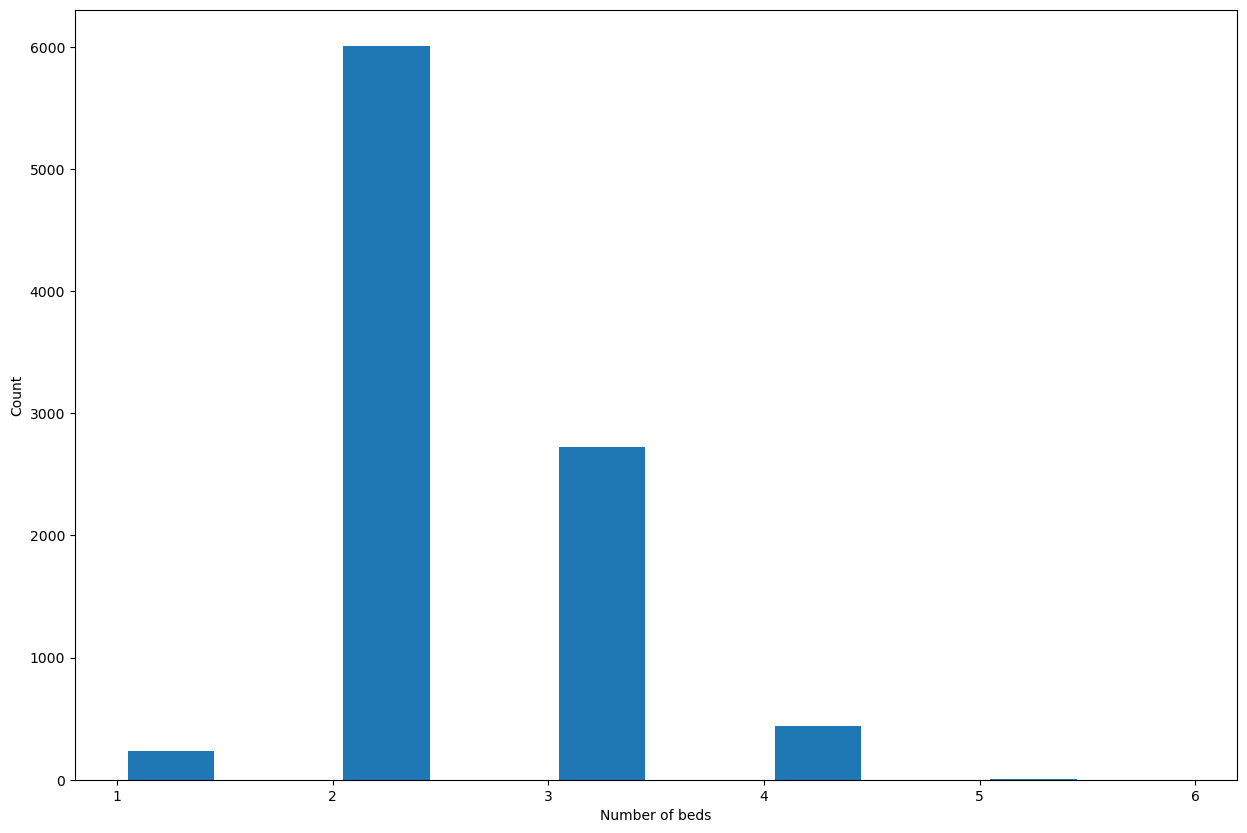

In [85]:
plt.hist(data4.Bed,rwidth=0.8)
plt.xlabel("Number of beds")
plt.ylabel("Count")

In [86]:
print(data4.duplicated().sum())

4674


In [89]:
duplicates = data4[data4.duplicated()]
print(duplicates)

                                                Location    Area  Bed  Bath  \
17            Baitul Aman Housing Society, Adabor, Dhaka  1550.0    3     3   
19            Baitul Aman Housing Society, Adabor, Dhaka  1550.0    3     3   
28         Shyamoli Housing (2nd Project), Adabor, Dhaka   850.0    2     2   
33     Block D, Mansurabad Housing Society, Adabor, D...   800.0    2     2   
34     Block D, Mansurabad Housing Society, Adabor, D...   800.0    2     2   
...                                                  ...     ...  ...   ...   
19909                        Tati Bazaar, Kotwali, Dhaka   600.0    2     2   
19912                                    Zafrabad, Dhaka   800.0    2     2   
19913                                    Zafrabad, Dhaka   800.0    2     2   
19915                                    Zafrabad, Dhaka   800.0    2     2   
19918                                  Keraniganj, Dhaka   740.0    2     2   

         Price   Place  price_per_sqft  
17     300

In [91]:
data5 = data4.drop_duplicates()

In [93]:
data4.shape

(9407, 7)

In [95]:
data5.shape

(4733, 7)

In [97]:
# data5.hist(figsize=(12, 10))

In [99]:
# pairplot = sns.pairplot(data5)
# pairplot.savefig("pairplot.png") 

In [101]:
df1 = data5.drop(['Location','price_per_sqft'],axis='columns')
df1.head(3)

,Area,Bed,Bath,Price,Place
10,1550.0,3,3,30000.0,Adabor
13,800.0,2,2,16000.0,Adabor
14,850.0,2,2,15000.0,Adabor


# One hot encoding

In [104]:
dummies = pd.get_dummies(df1.Place)
dummies.head(3)

,Adabor,Aftab Nagar,Agargaon,Badda,Banani,Banani DOHS,Banasree,Bangshal,Baridhara,Baridhara DOHS,...,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara,other
10,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [106]:
df11 = pd.concat([df1,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,Area,Bed,Bath,Price,Place,Adabor,Aftab Nagar,Agargaon,Badda,Banani,...,Shahjahanpur,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara
10,1550.0,3,3,30000.0,Adabor,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,800.0,2,2,16000.0,Adabor,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,850.0,2,2,15000.0,Adabor,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,800.0,2,2,15000.0,Adabor,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21,800.0,2,2,15000.0,Adabor,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [108]:
df12 = df11.drop('Place',axis='columns')
df12.head(2)

,Area,Bed,Bath,Price,Adabor,Aftab Nagar,Agargaon,Badda,Banani,Banani DOHS,...,Shahjahanpur,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara
10,1550.0,3,3,30000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,800.0,2,2,16000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
df12.shape

(4733, 58)

# Prediction

In [113]:
X = df12.drop(['Price'],axis='columns')
X.head(3)

,Area,Bed,Bath,Adabor,Aftab Nagar,Agargaon,Badda,Banani,Banani DOHS,Banasree,...,Shahjahanpur,Shantinagar,Shegunbagicha,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Tejgaon,Turag,Uttara
10,1550.0,3,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,800.0,2,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,850.0,2,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [115]:
X.shape

(4733, 57)

In [117]:
y = df12.Price
y.head(3)

10    30000.0
13    16000.0
14    15000.0
Name: Price, dtype: float64

In [119]:
len(y)

4733

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [122]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9450136542313003

In [123]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.9337888 , 0.92208904, 0.91399246, 0.90927368, 0.9254476 ])

In [125]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage
results = find_best_model_using_gridsearchcv(X, y)
results


,model,best_score,best_params
0,linear_regression,0.920963,{'fit_intercept': False}
1,lasso,0.920979,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.932217,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [128]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(DecisionTreeRegressor(criterion='squared_error', splitter='random'), X, y, cv=10)
print(cv_scores.mean(), cv_scores.std())

0.8104892816991571 0.17344849955827277


In [129]:
def predict_price(location, sqft, bath, beds):    
    loc_index = np.where(X.columns == location)[0][0]

    # Create an empty feature vector with the same number of columns as X
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = beds
    x[2] = bath

    # Set the location feature to 1
    if loc_index >= 0:
        x[loc_index] = 1

    # Convert the array to a DataFrame with appropriate column names
    x_df = pd.DataFrame([x], columns=X.columns)

    # Predict using the model
    return lr_clf.predict(x_df)[0]

In [133]:
feature_columns = X.columns  # Column names from your training data


In [139]:
predicted_price = predict_price('Bashundhara R-A', 1500, 3, 3)
print(predicted_price)

30770.593053933815


In [147]:
predicted_price = predict_price('Adabor',800, 3, 3)
print(predicted_price)

9202.633275527514


# pickle and columns file save

In [149]:
import pickle
with open('dhaka_home_rent_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [151]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))